## Handling Time in Python

In [ ]:
import datetime as dt
import pandas as pd
import pytz
import os

In [ ]:
tz_IT=pytz.timezone("Europe/Rome")

In [ ]:
print(dt.datetime.now(tz_IT))

2023-11-08 16:52:25.370022+01:00


In [ ]:
dt_current=dt.datetime.now(tz_IT)
print(dt_current.strftime("%Y-%m-%d %H:%M:%S"))

2023-11-09 14:40:11


## date time object and time-aware formats

In [ ]:
curr_time=dt_current.time()
curr_time

datetime.time(14, 40, 11, 330986)

In [ ]:
curr_date=dt_current.date()
curr_date

datetime.date(2023, 11, 9)

In [ ]:
dt_current=dt.datetime.combine(curr_date,curr_time).replace(microsecond=0)
dt_current

datetime.datetime(2023, 11, 9, 14, 40, 11)

In [ ]:
dt_current.weekday()

2

In [ ]:
DataFolder_path="/content/drive/MyDrive/EETBS 2023-2024/Data"
name_AC_cons_file="consumption_5545.csv"
path_AC_cons_file=os.path.join(DataFolder_path,name_AC_cons_file)
print(path_AC_cons_file)

/content/drive/MyDrive/EETBS 2023-2024/Data/consumption_5545.csv


In [ ]:
DF_consumption=pd.read_csv(path_AC_cons_file, sep=",", index_col=0, parse_dates=[0])#parse just for column 0 (make time objects)

In [ ]:
DF_consumption.index[-1]

Timestamp('2014-12-31 05:00:00')

In [ ]:
DF_consumption.index[-1].weekday() #can understand that this day is Wednesday

2

In [ ]:
DF_consumption.index[-1].hour

5

In [ ]:
name_irrad_file="irradiance_2014_gen.csv"
path_irrad_file=os.path.join(DataFolder_path,name_irrad_file)
print(path_irrad_file)

/content/drive/MyDrive/EETBS 2023-2024/Data/irradiance_2014_gen.csv


In [ ]:
DF_irradiance=pd.read_csv(path_irrad_file, sep=";", index_col=["localhour"], parse_dates=["localhour"])
DF_irradiance=DF_irradiance[["gen"]] #removed other columns, now just gen column

In [ ]:
DF_irradiance.loc[DF_irradiance.loc[:,"gen"]<0, "gen"]=0
DF_irradiance.loc[:,"gen"]

localhour
2014-01-01 00:00:00    0.0
2014-01-01 01:00:00    0.0
2014-01-01 02:00:00    0.0
2014-01-01 03:00:00    0.0
2014-01-01 04:00:00    0.0
                      ... 
2015-01-01 19:00:00    0.0
2015-01-01 20:00:00    0.0
2015-01-01 21:00:00    0.0
2015-01-01 22:00:00    0.0
2015-01-01 23:00:00    0.0
Name: gen, Length: 8783, dtype: float64

## Weather Data

In [ ]:
#we nwwd to remove 06 (time zone), if you wanna write function without defining use lambda
name_weather_file="Austin_weather_2014.csv"
path_weather_file=os.path.join(DataFolder_path,name_weather_file)
print(path_weather_file)

/content/drive/MyDrive/EETBS 2023-2024/Data/Austin_weather_2014.csv


In [ ]:
DF_weather = pd.read_csv(path_weather_file,sep=";", index_col = ["localhour"], parse_dates = ["localhour"], date_parser = lambda col:pd.to_datetime(col,utc=True).tz_convert("US/Central").tz_localize(None))

In [ ]:
DF_weather = DF_weather[["temperature"]]
DF_weather

,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65
2014-01-01 03:00:00,38.47
2014-01-01 04:00:00,38.00
...,...
2015-01-01 19:00:00,38.14
2015-01-01 20:00:00,38.18
2015-01-01 21:00:00,38.25


### Putting Data together

In [ ]:
DF_joined = DF_consumption.join([DF_irradiance,DF_weather])
DF_joined

,air conditioner_5545,gen,temperature
2014-01-01 06:00:00,0.0,0.000000,39.36
2014-01-01 07:00:00,0.0,0.052800,37.86
2014-01-01 08:00:00,0.0,0.773583,38.97
2014-01-01 09:00:00,0.0,2.097700,45.85
2014-01-01 10:00:00,0.0,3.036750,51.42
...,...,...,...
2014-12-31 01:00:00,NaN,0.000000,38.96
2014-12-31 02:00:00,NaN,0.000000,38.81
2014-12-31 03:00:00,NaN,0.000000,39.33
2014-12-31 04:00:00,NaN,0.000000,39.54


In [ ]:
DF_joined=DF_joined.rename(columns={"air conditioner_5545":"consumption","gen":"irradiance"})
DF_joined

,consumption,irradiance,temperature
2014-01-01 06:00:00,0.0,0.000000,39.36
2014-01-01 07:00:00,0.0,0.052800,37.86
2014-01-01 08:00:00,0.0,0.773583,38.97
2014-01-01 09:00:00,0.0,2.097700,45.85
2014-01-01 10:00:00,0.0,3.036750,51.42
...,...,...,...
2014-12-31 01:00:00,NaN,0.000000,38.96
2014-12-31 02:00:00,NaN,0.000000,38.81
2014-12-31 03:00:00,NaN,0.000000,39.33
2014-12-31 04:00:00,NaN,0.000000,39.54


In [ ]:
DF_joined.dropna(inplace=True)
DF_joined

,consumption,irradiance,temperature
2014-01-01 06:00:00,0.0,0.000000,39.36
2014-01-01 07:00:00,0.0,0.052800,37.86
2014-01-01 08:00:00,0.0,0.773583,38.97
2014-01-01 09:00:00,0.0,2.097700,45.85
2014-01-01 10:00:00,0.0,3.036750,51.42
...,...,...,...
2014-12-30 20:00:00,0.0,0.000000,41.52
2014-12-30 21:00:00,0.0,0.000000,40.37
2014-12-30 22:00:00,0.0,0.000000,40.15
2014-12-30 23:00:00,0.0,0.000000,40.00


## Tarek has got a clean dataset now, he wants to save

In [ ]:
name_joinedFile="pretty_joined_DF_EM.csv"
path_processedDataFolder="/content/drive/MyDrive/EETBS 2023-2024/ProcessedData"
path_joinedFile=os.path.join(path_processedDataFolder, name_joinedFile)
DF_joined.to_csv(path_joinedFile)

In [ ]:
DF_joined = pd.read_csv(path_joinedFile, index_col = 0, parse_dates = [0])

In [ ]:
DF_joined.tail(20)

,consumption,irradiance,temperature
2014-12-30 05:00:00,0.0,0.000000,41.85
2014-12-30 06:00:00,0.0,0.000000,42.09
2014-12-30 07:00:00,0.0,0.000000,42.15
2014-12-30 08:00:00,0.0,0.064533,42.67
2014-12-30 09:00:00,0.0,0.230900,42.25
2014-12-30 10:00:00,0.0,0.438817,43.40
2014-12-30 11:00:00,0.0,0.448533,44.43
2014-12-30 12:00:00,0.0,0.399217,45.57
2014-12-30 13:00:00,0.0,0.365983,46.44
2014-12-30 14:00:00,0.0,0.324083,46.66


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
DF_joined_selected=DF_joined.loc["2014-07-02 00:00:00":"2014-07-03 00:00:00",:]

In [ ]:
DF_joined_selected.head(24)

,consumption,irradiance,temperature
2014-07-02 00:00:00,739.183333,0.000000,77.42
2014-07-02 01:00:00,608.283333,0.000000,77.47
2014-07-02 02:00:00,423.150000,0.000000,75.42
2014-07-02 03:00:00,216.016667,0.000000,74.20
2014-07-02 04:00:00,208.200000,0.000000,75.02
2014-07-02 05:00:00,0.000000,0.000000,74.64
2014-07-02 06:00:00,0.000000,0.003267,72.75
2014-07-02 07:00:00,0.000000,0.181567,73.76
2014-07-02 08:00:00,0.000000,0.623283,75.53
2014-07-02 09:00:00,0.000000,1.334417,79.34


<Axes: >

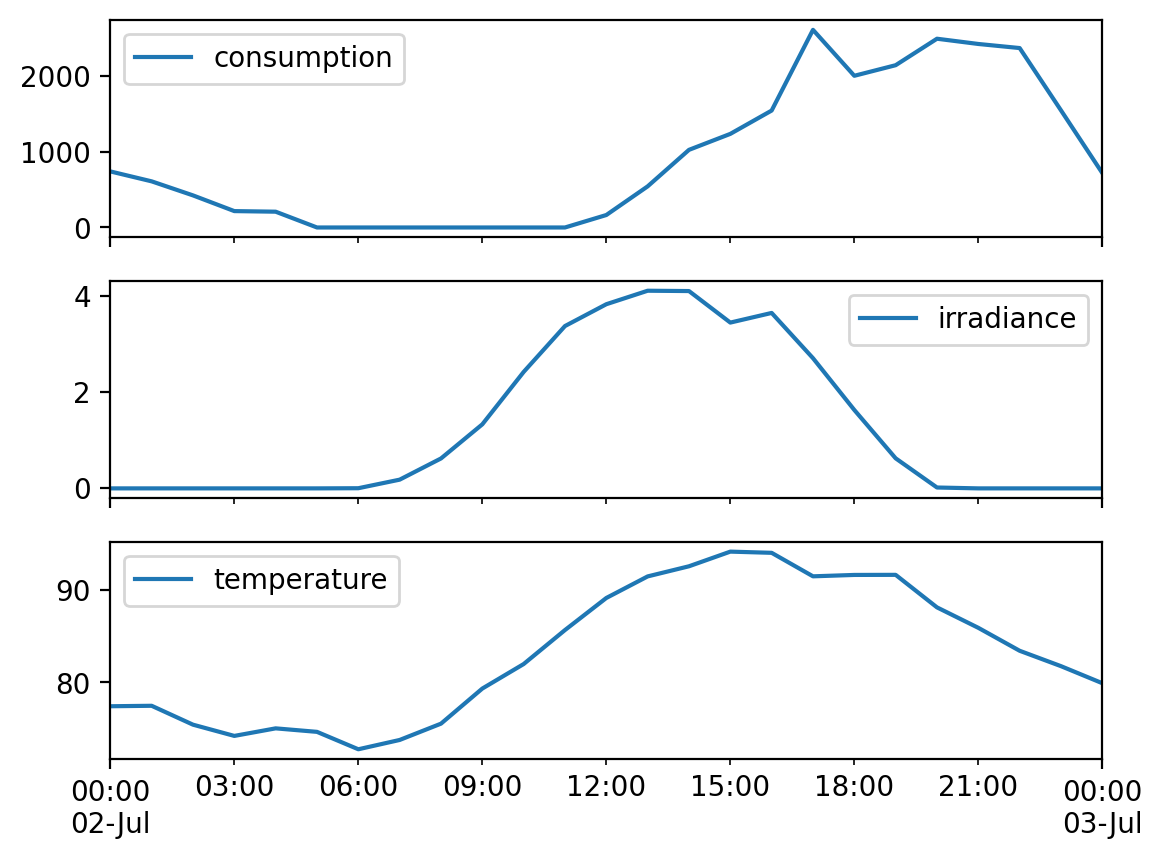

In [ ]:
fig, axs=plt.subplots(3,1,dpi=200, sharex=True)
DF_joined_selected[["consumption"]].plot(ax=axs[0])
DF_joined_selected[["irradiance"]].plot(ax=axs[1])
DF_joined_selected[["temperature"]].plot(ax=axs[2])

## Creating Time-related features

In [ ]:
DF_joined.loc[:, "hour"]=DF_joined.index.hour
DF_joined.loc[:, "dayOfWeek"]=DF_joined.index.dayofweek
DF_joined.head(12)

,consumption,irradiance,temperature,hour,dayOfWeek
2014-01-01 06:00:00,0.0,0.000000,39.36,6,2
2014-01-01 07:00:00,0.0,0.052800,37.86,7,2
2014-01-01 08:00:00,0.0,0.773583,38.97,8,2
2014-01-01 09:00:00,0.0,2.097700,45.85,9,2
2014-01-01 10:00:00,0.0,3.036750,51.42,10,2
2014-01-01 11:00:00,0.0,2.384400,57.66,11,2
2014-01-01 12:00:00,0.0,1.795133,60.49,12,2
2014-01-01 13:00:00,0.0,2.558650,63.36,13,2
2014-01-01 14:00:00,0.0,2.628450,65.15,14,2
2014-01-01 15:00:00,0.0,0.930317,64.19,15,2


In [ ]:
import numpy as np

In [ ]:
np.sin(DF_joined.index.hour*2*np.pi/24)

Float64Index([                   1.0,     0.9659258262890683,
                  0.8660254037844387,     0.7071067811865476,
                 0.49999999999999994,      0.258819045102521,
              1.2246467991473532e-16,    -0.2588190451025208,
                 -0.4999999999999997,    -0.7071067811865471,
              ...
                 -0.7071067811865471,    -0.8660254037844384,
                 -0.9659258262890683,                   -1.0,
                 -0.9659258262890684,    -0.8660254037844386,
                 -0.7071067811865477,    -0.5000000000000004,
                -0.25881904510252157,                    0.0],
             dtype='float64', length=8671)

In [ ]:
DF_joined.loc[:,"sin(hour)"]=np.sin(DF_joined.index.hour*2*np.pi/24)
DF_joined.loc[:,"cos(hour)"]=np.cos(DF_joined.index.hour*2*np.pi/24)

In [ ]:
DF_joined.loc[DF_joined.loc[:,"dayOfWeek"]>4,"weekendFlag"]=1
DF_joined.loc[DF_joined.loc[:,"dayOfWeek"]<5,"weekendFlag"]=0
DF_joined.head(100)

,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag
2014-01-01 06:00:00,0.0,0.000000,39.36,6,2,1.000000,6.123234e-17,0.0
2014-01-01 07:00:00,0.0,0.052800,37.86,7,2,0.965926,-2.588190e-01,0.0
2014-01-01 08:00:00,0.0,0.773583,38.97,8,2,0.866025,-5.000000e-01,0.0
2014-01-01 09:00:00,0.0,2.097700,45.85,9,2,0.707107,-7.071068e-01,0.0
2014-01-01 10:00:00,0.0,3.036750,51.42,10,2,0.500000,-8.660254e-01,0.0
...,...,...,...,...,...,...,...,...
2014-01-05 05:00:00,0.0,0.000000,52.40,5,6,0.965926,2.588190e-01,1.0
2014-01-05 06:00:00,0.0,0.000000,45.09,6,6,1.000000,6.123234e-17,1.0
2014-01-05 07:00:00,0.0,0.044817,39.03,7,6,0.965926,-2.588190e-01,1.0
2014-01-05 08:00:00,0.0,0.571517,37.68,8,6,0.866025,-5.000000e-01,1.0


In [ ]:
DF_joined.loc[:,"workingHour"]=0
DF_joined.loc[(DF_joined.loc[:,"hour"]>8) & (DF_joined.loc[:,"hour"]<19), "workingHour"]=1
DF_joined.head()

,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag,workingHour
2014-01-01 06:00:00,0.0,0.000000,39.36,6,2,1.000000,6.123234e-17,0.0,0
2014-01-01 07:00:00,0.0,0.052800,37.86,7,2,0.965926,-2.588190e-01,0.0,0
2014-01-01 08:00:00,0.0,0.773583,38.97,8,2,0.866025,-5.000000e-01,0.0,0
2014-01-01 09:00:00,0.0,2.097700,45.85,9,2,0.707107,-7.071068e-01,0.0,1
2014-01-01 10:00:00,0.0,3.036750,51.42,10,2,0.500000,-8.660254e-01,0.0,1


## Apart from weekend it's better to add national holidays

In [ ]:
DF_joined.loc[:, "month"]= DF_joined.index.month
DF_joined.loc[:, "weekOfYear"]= DF_joined.index.weekofyear
DF_joined.head()

<ipython-input-48-630886c5bb15>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  DF_joined.loc[:, "weekOfYear"]= DF_joined.index.weekofyear


,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag,workingHour,month,weekOfYear
2014-01-01 06:00:00,0.0,0.000000,39.36,6,2,1.000000,6.123234e-17,0.0,0,1,1
2014-01-01 07:00:00,0.0,0.052800,37.86,7,2,0.965926,-2.588190e-01,0.0,0,1,1
2014-01-01 08:00:00,0.0,0.773583,38.97,8,2,0.866025,-5.000000e-01,0.0,0,1,1
2014-01-01 09:00:00,0.0,2.097700,45.85,9,2,0.707107,-7.071068e-01,0.0,1,1,1
2014-01-01 10:00:00,0.0,3.036750,51.42,10,2,0.500000,-8.660254e-01,0.0,1,1,1


In [ ]:
def timeRelatedFeatureGen(inputDF):
  index_inputDF=inputDF.index
  inputDF.loc[:,"hour"]=index_inputDF.hour
  inputDF.loc[:,"dayOfWeek"]=index_inputDF.dayofweek
  inputDF.loc[:,"sin(hour)"]=np.sin(index_inputDF.hour*2*np.pi/24)
  inputDF.loc[:,"cos(hour)"]=np.cos(index_inputDF.hour*2*np.pi/24)
  inputDF.loc[inputDF.loc[:,"dayOfWeek"]>4,"weekendFlag"]=1
  inputDF.loc[inputDF.loc[:,"dayOfWeek"]<5,"weekendFlag"]=0
  inputDF.loc[:, "workingHour"]=0
  inputDF.loc[(inputDF.loc[:,"hour"]>8) & (inputDF.loc[:,"hour"]<19), "workingHour"]=1
  inputDF.loc[:, "month"]= index_inputDF.month
  inputDF.loc[:, "weekOfYear"]= index_inputDF.weekofyear
  return inputDF

In [ ]:
name_joinedFile_withTimeRelatedFeatures = "joined_DF_withTimeRelatedFeatures_EM.csv"
path_processedDataFolder = "/content/drive/MyDrive/EETBS 2023-2024/ProcessedData"
path_joinedFile_withTimeRelatedFeatures= os.path.join(path_processedDataFolder, name_joinedFile_withTimeRelatedFeatures)
DF_joined.to_csv(path_joinedFile_withTimeRelatedFeatures)

## Lagged Values

In [ ]:
DF_joined_selected=DF_joined.loc["2014-07-02 00:00:00":"2014-07-03 00:00:00",:]

In [ ]:
DF_joined_selected.head(24)

,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag,workingHour,month,weekOfYear
2014-07-02 00:00:00,739.183333,0.000000,77.42,0,2,0.000000e+00,1.000000e+00,0.0,0,7,27
2014-07-02 01:00:00,608.283333,0.000000,77.47,1,2,2.588190e-01,9.659258e-01,0.0,0,7,27
2014-07-02 02:00:00,423.150000,0.000000,75.42,2,2,5.000000e-01,8.660254e-01,0.0,0,7,27
2014-07-02 03:00:00,216.016667,0.000000,74.20,3,2,7.071068e-01,7.071068e-01,0.0,0,7,27
2014-07-02 04:00:00,208.200000,0.000000,75.02,4,2,8.660254e-01,5.000000e-01,0.0,0,7,27
2014-07-02 05:00:00,0.000000,0.000000,74.64,5,2,9.659258e-01,2.588190e-01,0.0,0,7,27
2014-07-02 06:00:00,0.000000,0.003267,72.75,6,2,1.000000e+00,6.123234e-17,0.0,0,7,27
2014-07-02 07:00:00,0.000000,0.181567,73.76,7,2,9.659258e-01,-2.588190e-01,0.0,0,7,27
2014-07-02 08:00:00,0.000000,0.623283,75.53,8,2,8.660254e-01,-5.000000e-01,0.0,0,7,27
2014-07-02 09:00:00,0.000000,1.334417,79.34,9,2,7.071068e-01,-7.071068e-01,0.0,1,7,27


In [ ]:
DF_joined.loc[:,"temperature_1h"]=DF_joined.loc[:,"temperature"].shift(1)
DF_joined.loc[:,"temperature_2h"]=DF_joined.loc[:,"temperature"].shift(2)
DF_joined[["consumption","temperature","temperature_1h","temperature_2h"]]

,consumption,temperature,temperature_1h,temperature_2h
2014-01-01 06:00:00,0.0,39.36,NaN,NaN
2014-01-01 07:00:00,0.0,37.86,39.36,NaN
2014-01-01 08:00:00,0.0,38.97,37.86,39.36
2014-01-01 09:00:00,0.0,45.85,38.97,37.86
2014-01-01 10:00:00,0.0,51.42,45.85,38.97
...,...,...,...,...
2014-12-30 20:00:00,0.0,41.52,41.88,43.03
2014-12-30 21:00:00,0.0,40.37,41.52,41.88
2014-12-30 22:00:00,0.0,40.15,40.37,41.52
2014-12-30 23:00:00,0.0,40.00,40.15,40.37


In [ ]:
lagStart = 1
lagEnd = 6+1
lagInterval = 1
columnName = "temperature"

In [ ]:
list(range(lagStart,lagEnd,lagInterval))

[1, 2, 3, 4, 5, 6]

In [ ]:
for i in list(range(lagStart,lagEnd,lagInterval)):
  nameOfNewColumn = columnName+""+str(i)+"h"
  DF_joined.loc[:,nameOfNewColumn] = DF_joined.loc[:,columnName].shift(i)

In [ ]:
DF_joined.head(24)

,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag,workingHour,month,weekOfYear,temperature_1h,temperature_2h,temperature1h,temperature2h,temperature3h,temperature4h,temperature5h,temperature6h
2014-01-01 06:00:00,0.0,0.000000,39.36,6,2,1.000000e+00,6.123234e-17,0.0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 07:00:00,0.0,0.052800,37.86,7,2,9.659258e-01,-2.588190e-01,0.0,0,1,1,39.36,NaN,39.36,NaN,NaN,NaN,NaN,NaN
2014-01-01 08:00:00,0.0,0.773583,38.97,8,2,8.660254e-01,-5.000000e-01,0.0,0,1,1,37.86,39.36,37.86,39.36,NaN,NaN,NaN,NaN
2014-01-01 09:00:00,0.0,2.097700,45.85,9,2,7.071068e-01,-7.071068e-01,0.0,1,1,1,38.97,37.86,38.97,37.86,39.36,NaN,NaN,NaN
2014-01-01 10:00:00,0.0,3.036750,51.42,10,2,5.000000e-01,-8.660254e-01,0.0,1,1,1,45.85,38.97,45.85,38.97,37.86,39.36,NaN,NaN
2014-01-01 11:00:00,0.0,2.384400,57.66,11,2,2.588190e-01,-9.659258e-01,0.0,1,1,1,51.42,45.85,51.42,45.85,38.97,37.86,39.36,NaN
2014-01-01 12:00:00,0.0,1.795133,60.49,12,2,1.224647e-16,-1.000000e+00,0.0,1,1,1,57.66,51.42,57.66,51.42,45.85,38.97,37.86,39.36
2014-01-01 13:00:00,0.0,2.558650,63.36,13,2,-2.588190e-01,-9.659258e-01,0.0,1,1,1,60.49,57.66,60.49,57.66,51.42,45.85,38.97,37.86
2014-01-01 14:00:00,0.0,2.628450,65.15,14,2,-5.000000e-01,-8.660254e-01,0.0,1,1,1,63.36,60.49,63.36,60.49,57.66,51.42,45.85,38.97
2014-01-01 15:00:00,0.0,0.930317,64.19,15,2,-7.071068e-01,-7.071068e-01,0.0,1,1,1,65.15,63.36,65.15,63.36,60.49,57.66,51.42,45.85


In [ ]:
def LaggedColumnCreator(inputDF,columnName,lagStart,lagEnd,lagInterval):
  for i in list(range(lagStart,lagEnd,lagInterval)):
    nameOfNewColumn = columnName+""+str(i)+"h"
    inputDF.loc[:,nameOfNewColumn] = inputDF.loc[:,columnName].shift(i)
  return inputDF

In [ ]:
DF_joined=LaggedColumnCreator(DF_joined,"consumption",1,24+1,1)
DF_joined.columns

Index(['consumption', 'irradiance', 'temperature', 'hour', 'dayOfWeek',
       'sin(hour)', 'cos(hour)', 'weekendFlag', 'workingHour', 'month',
       'weekOfYear', 'temperature_1h', 'temperature_2h', 'temperature1h',
       'temperature2h', 'temperature3h', 'temperature4h', 'temperature5h',
       'temperature6h', 'consumption1h', 'consumption2h', 'consumption3h',
       'consumption4h', 'consumption5h', 'consumption6h', 'consumption7h',
       'consumption8h', 'consumption9h', 'consumption10h', 'consumption11h',
       'consumption12h', 'consumption13h', 'consumption14h', 'consumption15h',
       'consumption16h', 'consumption17h', 'consumption18h', 'consumption19h',
       'consumption20h', 'consumption21h', 'consumption22h', 'consumption23h',
       'consumption24h'],
      dtype='object')

In [ ]:
DF_joined=LaggedColumnCreator(DF_joined,"irradiance",3,6+1,1)
DF_joined.head(24)

,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag,workingHour,month,...,consumption19h,consumption20h,consumption21h,consumption22h,consumption23h,consumption24h,irradiance3h,irradiance4h,irradiance5h,irradiance6h
2014-01-01 06:00:00,0.0,0.000000,39.36,6,2,1.000000e+00,6.123234e-17,0.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 07:00:00,0.0,0.052800,37.86,7,2,9.659258e-01,-2.588190e-01,0.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 08:00:00,0.0,0.773583,38.97,8,2,8.660254e-01,-5.000000e-01,0.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 09:00:00,0.0,2.097700,45.85,9,2,7.071068e-01,-7.071068e-01,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2014-01-01 10:00:00,0.0,3.036750,51.42,10,2,5.000000e-01,-8.660254e-01,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.052800,0.000000,NaN,NaN
2014-01-01 11:00:00,0.0,2.384400,57.66,11,2,2.588190e-01,-9.659258e-01,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.773583,0.052800,0.000000,NaN
2014-01-01 12:00:00,0.0,1.795133,60.49,12,2,1.224647e-16,-1.000000e+00,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2.097700,0.773583,0.052800,0.000000
2014-01-01 13:00:00,0.0,2.558650,63.36,13,2,-2.588190e-01,-9.659258e-01,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,3.036750,2.097700,0.773583,0.052800
2014-01-01 14:00:00,0.0,2.628450,65.15,14,2,-5.000000e-01,-8.660254e-01,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2.384400,3.036750,2.097700,0.773583
2014-01-01 15:00:00,0.0,0.930317,64.19,15,2,-7.071068e-01,-7.071068e-01,0.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.795133,2.384400,3.036750,2.097700


In [ ]:
DF_joined.dropna(inplace=True)
DF_joined

,consumption,irradiance,temperature,hour,dayOfWeek,sin(hour),cos(hour),weekendFlag,workingHour,month,...,consumption19h,consumption20h,consumption21h,consumption22h,consumption23h,consumption24h,irradiance3h,irradiance4h,irradiance5h,irradiance6h
2014-01-02 06:00:00,0.0,0.000000,36.82,6,3,1.000000,6.123234e-17,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2014-01-02 07:00:00,0.0,0.054383,34.71,7,3,0.965926,-2.588190e-01,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2014-01-02 08:00:00,0.0,0.601517,33.90,8,3,0.866025,-5.000000e-01,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2014-01-02 09:00:00,0.0,2.112517,35.78,9,3,0.707107,-7.071068e-01,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2014-01-02 10:00:00,0.0,3.271167,38.29,10,3,0.500000,-8.660254e-01,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.054383,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-30 20:00:00,0.0,0.000000,41.52,20,1,-0.866025,5.000000e-01,0.0,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.056333,0.157367,0.324083
2014-12-30 21:00:00,0.0,0.000000,40.37,21,1,-0.707107,7.071068e-01,0.0,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.056333,0.157367
2014-12-30 22:00:00,0.0,0.000000,40.15,22,1,-0.500000,8.660254e-01,0.0,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.056333
2014-12-30 23:00:00,0.0,0.000000,40.00,23,1,-0.258819,9.659258e-01,0.0,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
name_joinedFile_WithLaggedAndTimeRelatedFeatures= "pretty_joined_DF_WtihLaggedAndTimeRelatedFeature_EM.csv"
path_processedDataFolder = "/content/drive/MyDrive/EETBS 2023-2024/ProcessedData"
path_joinedFile_WithLaggedAndTimeRelatedFeatures = os.path.join(path_processedDataFolder,name_joinedFile_WithLaggedAndTimeRelatedFeatures)
DF_joined.to_csv(path_joinedFile_WithLaggedAndTimeRelatedFeatures)